In [1]:
!pip install deepchem
import deepchem as dc
dc.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.2/693.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 18.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
jax 0.4.23 requires scipy>=1.9, but you have scipy 1.8.1 which is incompatible.
jaxlib 0.4.23+cuda12.cudnn89 requires scipy>=1.9, but you have scipy 1.8.1 which is incompatible.


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


'2.7.1'

In [2]:
!pip install rdkit

In [3]:
!pip install mols2grid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.9 MB/s eta 0:00:00


In [4]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
import numpy as np

from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem, DataStructs
from rdkit.Chem import (
    PandasTools,
    Draw,
    Descriptors,
    MACCSkeys,
    rdFingerprintGenerator,
)
import io
from google.colab import files
import mols2grid

In [5]:
from google.colab import files
uploaded = files.upload()

Saving tox21_PPAR_curated.xlsx to tox21_PPAR_curated.xlsx


In [6]:
df2 = pd.read_excel('tox21_PPAR_curated.xlsx')
df2 = df2.rename(columns={"PPAR": "y", "smiles": "ids"})
df2["w"] = 1
df2

,y,mol_id,ids,num,w
0,0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1,0,1
1,0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O,1,1
2,0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C,3,1
3,0,TOX3028,CC(O)(P(=O)(O)O)P(=O)(O)O,4,1
4,0,TOX5110,CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C,5,1
...,...,...,...,...,...
5904,0,TOX25182,Cc1nc2ccccn2c(=O)c1CCN1CCC(C(=O)c2ccc(F)cc2)CC1,8003,1
5905,0,TOX25180,NC(=O)CN1CC(O)CC1=O,8005,1
5906,0,TOX25186,CCCn1c(=O)[nH]c(=O)c2[nH]cnc21,8007,1
5907,0,TOX2377,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...,8012,1


,y,mol_id,ids,num,w,ROMol
0,0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1,0,1,
1,0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O,1,1,
2,0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C,3,1,
3,0,TOX3028,CC(O)(P(=O)(O)O)P(=O)(O)O,4,1,
4,0,TOX5110,CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C,5,1,
...,...,...,...,...,...,...
5904,0,TOX25182,Cc1nc2ccccn2c(=O)c1CCN1CCC(C(=O)c2ccc(F)cc2)CC1,8003,1,
5905,0,TOX25180,NC(=O)CN1CC(O)CC1=O,8005,1,
5906,0,TOX25186,CCCn1c(=O)[nH]c(=O)c2[nH]cnc21,8007,1,
5907,0,TOX2377,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...,8012,1,

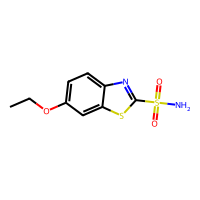
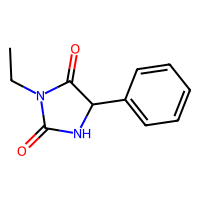
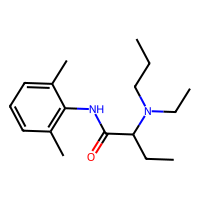
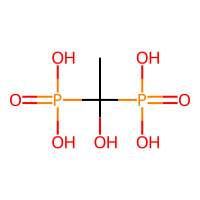
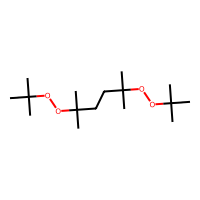
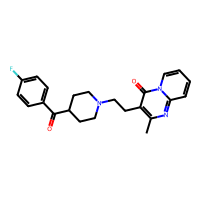
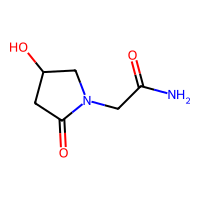
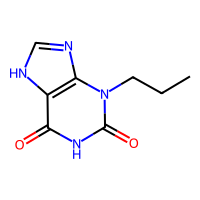
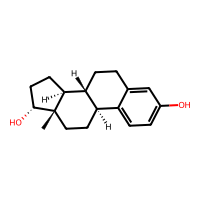
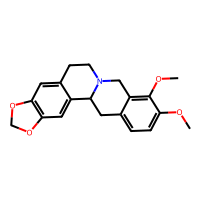

In [7]:
PandasTools.AddMoleculeColumnToFrame(df2, smilesCol="ids")
df2

In [8]:
ids_list = df2['ids'].values.tolist()
ids = df2['ids']
ids = pd.DataFrame(ids)
datapoints = len(ids_list)
featurizer = dc.feat.CircularFingerprint(size=1024)
#featurizer = dc.feat.ConvMolFeaturizer(datapoints)
features = featurizer.featurize(ids_list)
features = pd.DataFrame(features)
features_list = list(features.columns.values)
list_X = []
for i in range(1,len(features_list)+1):
#    list_X.append('X')
    list_X.append('X'+str(i))

features.set_axis(list_X, axis=1,inplace=True)
df_featurized2 = pd.concat([features, ids, df2.y, df2.w], axis=1, join='inner')
df_featurized2

<ipython-input-8-f0dafa6ba427>:15: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  features.set_axis(list_X, axis=1,inplace=True)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X1018,X1019,X1020,X1021,X1022,X1023,X1024,ids,y,w
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCOc1ccc2nc(S(N)(=O)=O)sc2c1,0,1
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,CCN1C(=O)NC(c2ccccc2)C1=O,0,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CC(O)(P(=O)(O)O)P(=O)(O)O,0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5904,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Cc1nc2ccccn2c(=O)c1CCN1CCC(C(=O)c2ccc(F)cc2)CC1,0,1
5905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NC(=O)CN1CC(O)CC1=O,0,1
5906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCCn1c(=O)[nH]c(=O)c2[nH]cnc21,0,1
5907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...,0,1


In [9]:
df_featurized2['y'].value_counts()[0]

5732

In [10]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
df_majority = df_featurized2[(df_featurized2['y']==0)]
df_minority = df_featurized2[(df_featurized2['y']==1)]
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= df_featurized2['y'].value_counts()[0], # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [11]:
df_upsampled

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X1018,X1019,X1020,X1021,X1022,X1023,X1024,ids,y,w
3627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,N[C@H]1[C@@H]2CN(c3nc4c(cc3F)c(=O)c(C(=O)O)cn4...,1,1
3310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[O-][n+]1ccccc1SSc1cccc[n+]1[O-],1,1
348,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cc1cc(O)c2c(O)c3c(O)cccc3cc2c1,1,1
3696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,COc1ccc(C(=O)/C(Br)=C\C(=O)O)cc1,1,1
2497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,O=C(O)Cc1cccc2ccccc12,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5904,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Cc1nc2ccccn2c(=O)c1CCN1CCC(C(=O)c2ccc(F)cc2)CC1,0,1
5905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NC(=O)CN1CC(O)CC1=O,0,1
5906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCCn1c(=O)[nH]c(=O)c2[nH]cnc21,0,1
5907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...,0,1


In [12]:
# Convertig dataframe concat into NumpyDataset object (datasetnp)
datasetnp = dc.data.NumpyDataset.from_dataframe(df_upsampled)

# Creating a RandomSplitter object and splitting into just only train and valid datasets
splitter = dc.splits.RandomSplitter()
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(datasetnp,frac_train = 0.8, frac_valid = 0.2, frac_test= 0.0)

In [13]:
n_tasks = 1
n_features = train_dataset.X.shape[1]

In [14]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import randint
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report

In [15]:
rf = RandomForestClassifier()
rf.fit(train_dataset.X,train_dataset.y.ravel())

RandomForestClassifier()

In [16]:
y_pred = rf.predict(valid_dataset.X)

In [17]:
accuracy = accuracy_score(valid_dataset.y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.996947230702137


In [18]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# cross validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=100,
                                 cv=cv)

# Fit the random search object to the data
rand_search.fit(train_dataset.X,train_dataset.y.ravel())

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ec69e013a00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ec69e012a40>})

In [19]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 19, 'n_estimators': 325}


In [20]:
print(best_rf)

RandomForestClassifier(max_depth=19, n_estimators=325)


In [21]:
d = rand_search.best_params_
metric = dc.metrics.Metric(
dc.metrics.roc_auc_score, np.mean, mode="classification")
import sklearn
from sklearn.ensemble import RandomForestClassifier

best_rf = sklearn.ensemble.RandomForestClassifier(n_estimators= d['n_estimators'],
                                                        max_depth=d['max_depth'])
model = dc.models.SklearnModel(best_rf)

In [22]:
model.fit(train_dataset)
model.save()

In [23]:
#save model
import pickle

with open("model.pkl", "wb") as f:
     pickle.dump(model, f)

#load model
with open("model.pkl", "rb") as f:
     model = pickle.load(f)

In [24]:
#save model
import pickle

with open("best_rf.pkl", "wb") as f:
     pickle.dump(best_rf, f)

#load model
with open("best_rf.pkl", "rb") as f:
     best_rf = pickle.load(f)

In [25]:
metric = dc.metrics.Metric(
dc.metrics.roc_auc_score, np.mean, mode="classification")

print("Evaluating model")
train_scores = model.evaluate(train_dataset, [metric])
valid_scores = model.evaluate(valid_dataset, [metric])
print("Train scores")
print(train_scores)
print("Validation scores")
print(valid_scores)

Evaluating model
Train scores
{'mean-roc_auc_score': 0.9998814762842225}
Validation scores
{'mean-roc_auc_score': 0.9977547258907219}


In [26]:
print(best_rf)

RandomForestClassifier(max_depth=19, n_estimators=325)


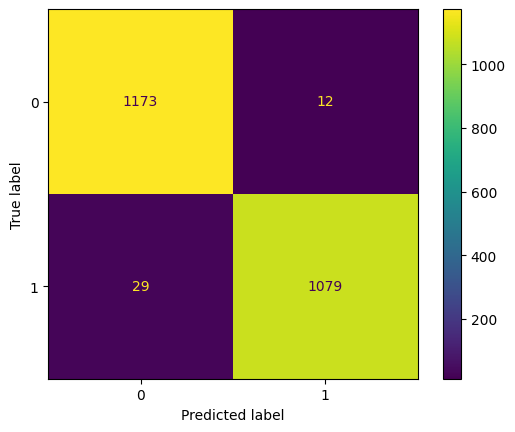

In [27]:
# Generate predictions with the best model
y_pred = best_rf.predict(valid_dataset.X)

# Create the confusion matrix
cm = confusion_matrix(valid_dataset.y, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [28]:
from sklearn.metrics import f1_score

y_pred = best_rf.predict(valid_dataset.X)

accuracy = accuracy_score(valid_dataset.y, y_pred)
precision = precision_score(valid_dataset.y, y_pred)
recall = recall_score(valid_dataset.y, y_pred)

precision_s = precision_score(valid_dataset.y, y_pred,average='micro')
recall_s    = recall_score(valid_dataset.y, y_pred, average='micro')

print("Accuracy     : ", accuracy)
print("Precision    : ", precision)
print("Recall       : ", recall)
print("F1_score     : ", 2*((precision_s*recall_s)/(precision_s + recall_s)))

Accuracy     :  0.9821194941125163
Precision    :  0.9890009165902841
Recall       :  0.973826714801444
F1_score     :  0.9821194941125163


In [29]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)
dt.fit(train_dataset.X, train_dataset.y)
y_pred = best_rf.predict(valid_dataset.X)
print("Accuracy score: " + str(accuracy_score(valid_dataset.y, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(valid_dataset.y, y_pred)))
print("\nClassification report: \n" + str(classification_report(valid_dataset.y, y_pred)))

Accuracy score: 0.9821194941125163

Confusion matrix: 
[[1173   12]
 [  29 1079]]

Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1185
           1       0.99      0.97      0.98      1108

    accuracy                           0.98      2293
   macro avg       0.98      0.98      0.98      2293
weighted avg       0.98      0.98      0.98      2293



[Text(0.5769230769230769, 0.875, 'x[778] <= 0.5\nentropy = 1.0\nsamples = 9171\nvalue = [4547, 4624]'),
 Text(0.3076923076923077, 0.625, 'x[389] <= 0.5\nentropy = 0.998\nsamples = 8596\nvalue = [4506, 4090]'),
 Text(0.15384615384615385, 0.375, 'x[175] <= 0.5\nentropy = 0.97\nsamples = 5808\nvalue = [3495, 2313]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.922\nsamples = 4578\nvalue = [3033, 1545]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.955\nsamples = 1230\nvalue = [462, 768]'),
 Text(0.46153846153846156, 0.375, 'x[650] <= 0.5\nentropy = 0.945\nsamples = 2788\nvalue = [1011, 1777]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.66\nsamples = 269\nvalue = [223, 46]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.896\nsamples = 2519\nvalue = [788, 1731]'),
 Text(0.8461538461538461, 0.625, 'x[378] <= 0.5\nentropy = 0.371\nsamples = 575\nvalue = [41, 534]'),
 Text(0.7692307692307693, 0.375, 'x[926] <= 0.5\nentropy = 0.3\nsamples = 564\nvalue = [30, 534]'),
 Text(0.69230769

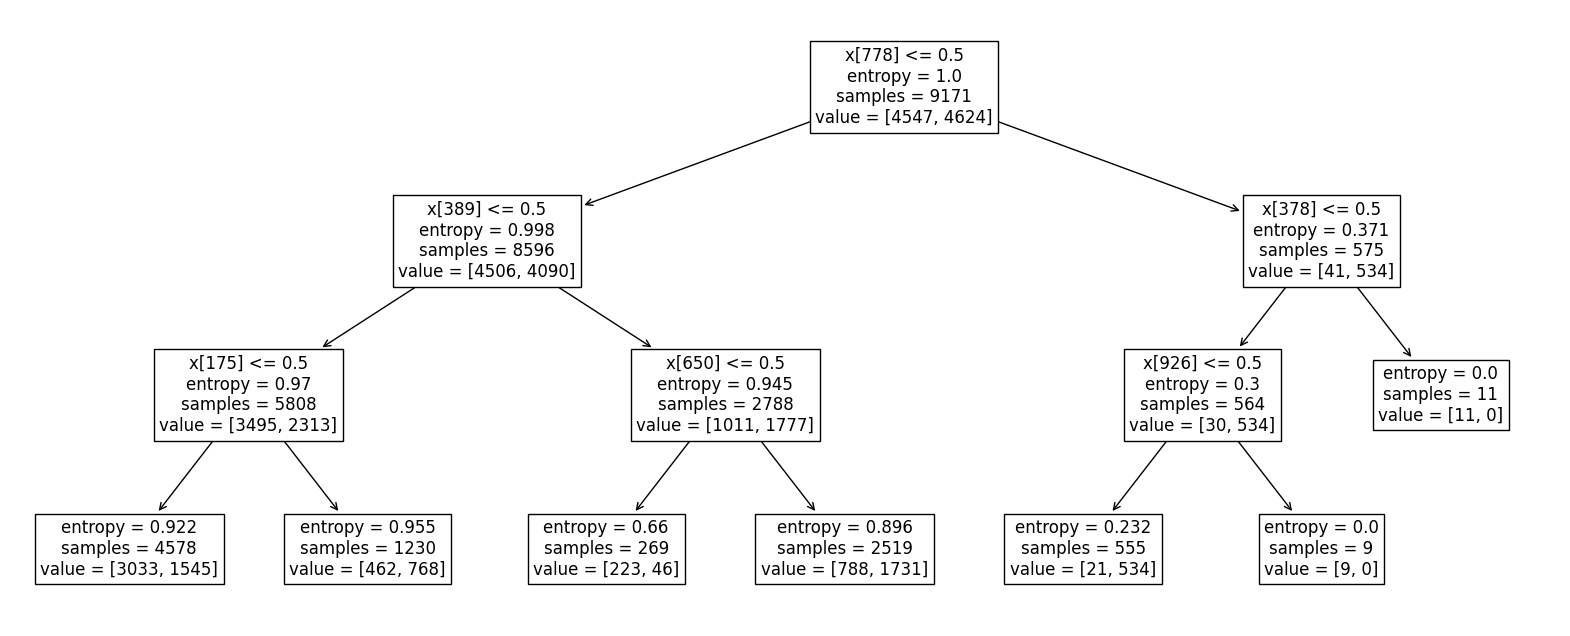

In [30]:
fig = plt.subplots(figsize=(20, 8))
tree.plot_tree(dt, fontsize=12)

interactive(children=(IntSlider(value=1, description='max_depth:', max=6, min=1), Output()), _dom_classes=('wi…

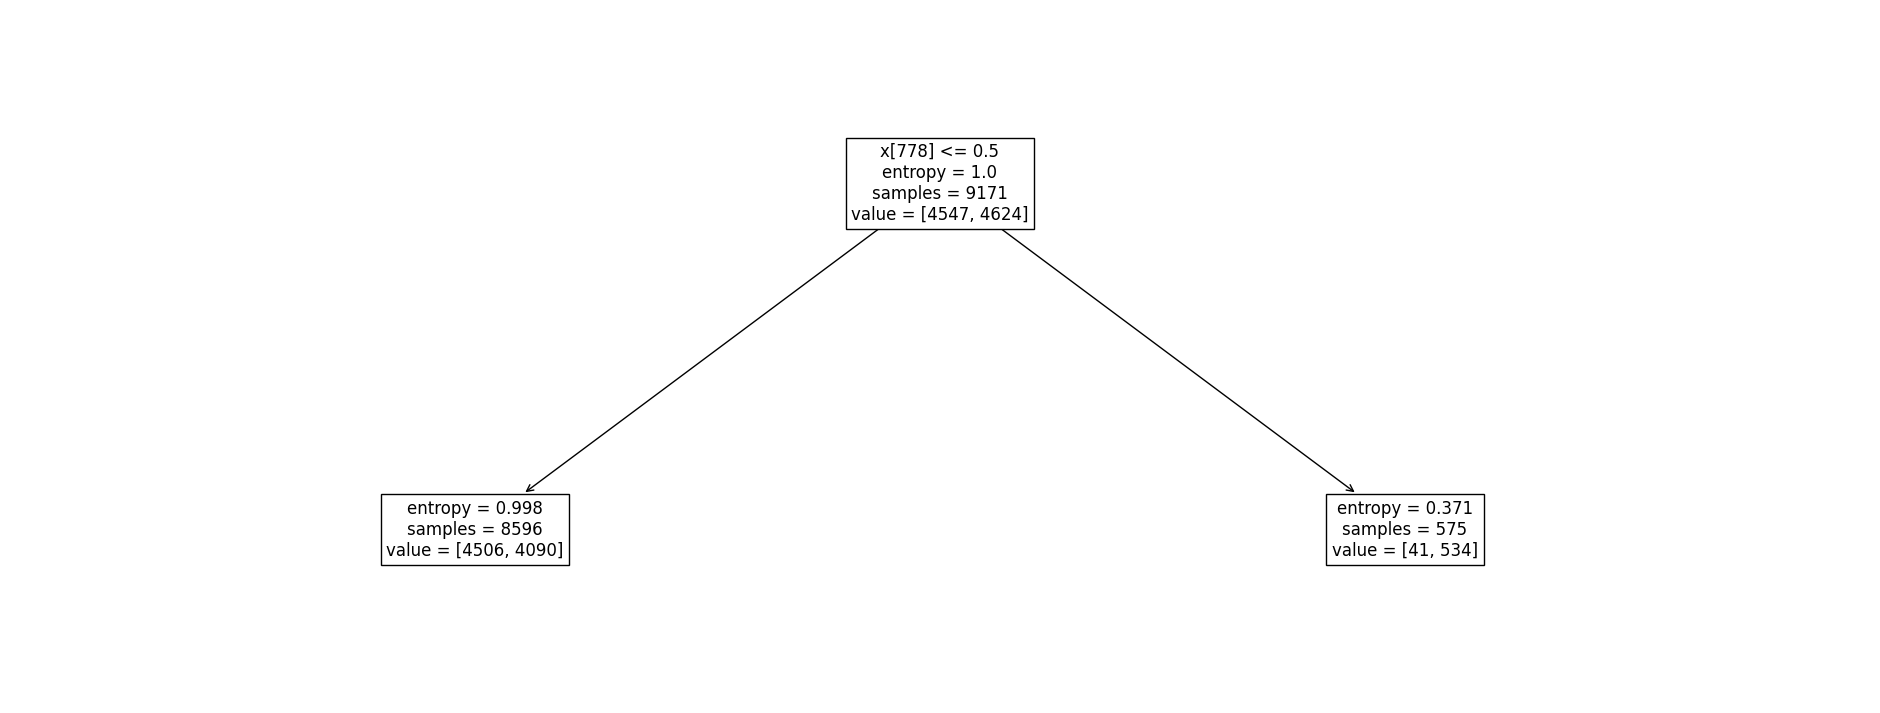

In [31]:
import ipywidgets as widgets
from IPython.display import display
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

value_max_depth = widgets.IntSlider(value=1, min=1, max=6, step=1, description='max_depth:')

def DecisionTree(valor):
  dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = valor, random_state = 1)
  dt.fit(train_dataset.X, train_dataset.y)
  y_pred = best_rf.predict(valid_dataset.X)
  fig = plt.subplots(figsize=(20+4*valor, 8+valor))
  tree.plot_tree(dt, fontsize=12)


widgets.interact(DecisionTree , valor = value_max_depth);

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html#scipy.stats.fisher_exact

The p value, or probability value, is a statistical measurement used to validate a hypothesis against observed data. It tells you how likely it is that your data could have occurred under the null hypothesis. The level of statistical significance is often expressed as a p-value between 0 and 1. A p-value measures the probability of obtaining the observed results, assuming that the null hypothesis is true. The lower the p-value, the greater the statistical significance of the observed difference.

In [32]:
from scipy.stats import hypergeom

table = cm
M = table.sum()
n = table[0].sum()
N = table[:, 0].sum()
start, end = hypergeom.support(M, n, N)
fisher = pd.DataFrame(hypergeom.pmf(np.arange(start, end+1), M, n, N), columns=['p-value'])
fisher

,p-value
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1087,0.0
1088,0.0
1089,0.0
1090,0.0


In [33]:
from scipy.stats import fisher_exact
pvalue = fisher_exact(table, alternative='two-sided')
pvalue[1]

0.0

##Explaining model (LIME)

In [34]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=4e3048ee474eb6fb010a63b37f915425bb4c57b1f8faa5990732ba515cffff38
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [35]:
from lime import lime_tabular
feature_names = ["fp_%s"  % x for x in range(n_features)]
explainer = lime_tabular.LimeTabularExplainer(train_dataset.X,
                                              feature_names=feature_names,
                                              categorical_features=feature_names,
                                              class_names=['np', 'p'],
                                              discretize_continuous=True)

In [36]:
#FUNÇÕES
# We need a function which takes a 2d numpy array (samples, features) and returns predictions (samples,)

def eval_model(my_model,i):
    def eval_closure(x):
        ds = dc.data.NumpyDataset(x, n_tasks=n_tasks)
        # The 0th task is NR-AR
        predictions = my_model.predict(ds)[:,i]
        return predictions
    return eval_closure

##################################
def fp_mol(mol, fp_length=n_features):
    """
    returns: dict of <int:list of string>
        dictionary mapping fingerprint index
        to list of SMILES strings that activated that fingerprint
    """
    d = {}
    feat = dc.feat.CircularFingerprint(sparse=True, smiles=True, size=n_features)
    retval = feat._featurize(mol)
    for k, v in retval.items():
        index = k % fp_length
        if index not in d:
            d[index] = set()
        d[index].add(v['smiles'])
    return d
#######################
def verifTox(l):
  somaTox = 0.0
  somaNao = 0.0

  for peso in l:
      if peso > 0:
        somaTox += peso
      else:
        somaNao += peso
  if abs(somaTox) > abs(somaNao):
    return ("YES",somaTox,somaNao)
  else:
    return ("NO",somaTox,somaNao)
#########################

In [37]:
print(best_rf.predict_proba(valid_dataset.X)[:,1])

[0.15041544 0.85213371 0.11281305 ... 0.16047179 0.15248172 0.7364735 ]


In [38]:
import statistics as st

dfAllFragMolPeso = pd.DataFrame()
dfAllMolTasksInfo = pd.DataFrame()
dfAllMolTox = pd.DataFrame()

for i in range(n_tasks):
    #model_fn = eval_model(best_rf,i)
    model_fn = lambda x: best_rf.predict_proba(x).astype(float)
    lista_active_id = np.where((valid_dataset.y[:,i] == 1) * (best_rf.predict_proba(valid_dataset.X)[:,1] > 0.8))[0] #list of molecules which are toxic and (*) are predicted as such by the model
    print('\nTASK:',i)
    print()

    #Dataframe that indicates if the molecule is toxic or not and how much is it(total)
    dfMolTox = pd.DataFrame(columns=["Task","Molecule Index","Molecule Id","Result","Penetrate","Non-Penetrate"])

    for active_id in lista_active_id:
      exp = explainer.explain_instance(valid_dataset.X[active_id], model_fn , num_features=100, top_labels=1)
      print('check', active_id)

      # What fragments activated what fingerprints in our active molecule?
      my_fragments = fp_mol(Chem.MolFromSmiles(valid_dataset.ids[active_id]))
      q = [key for key in exp.as_map().keys()][0]
      map = exp.as_map()[q]
      dic = dict(map)
      lista_pesos = []

      #Dataframe with molecule's information, its toxic fragments and weight
      dfFragMolPeso = pd.DataFrame(columns=["Task","Fingerprint","Fragment SMILES","Weight","Active Molecule"])

      for fp_index in my_fragments:
        if fp_index in dic:
          peso = dic[fp_index]
          frag = my_fragments[fp_index]
          lista_pesos.append(peso)

          if peso > 0: #Weight that positively contributes to toxicity
              dfFragMolPeso.loc[dfFragMolPeso.shape[0]] = [i,fp_index,frag, peso,active_id]#Adding a row at the bottom

      #Inserting data at dfMolTox
      vt = verifTox(lista_pesos) #variable that contains the sum of all of toxic fragments weight, non toxic fragment weight and the result of the molecule (if it's more toxic or not)
      smile = valid_dataset.select([active_id]).ids[0] #smile of the molecule in question
      dfMolTox.loc[dfMolTox.shape[0]] = [i,active_id,smile,vt[0],vt[1],vt[2]]
      dfAllMolTox = dfAllMolTox.append(dfMolTox)
      #dfAllMolTox = pd.concat([dfAllMolTox, dfMolTox])

      #Putting together all dfFragMolPeso
      if len(lista_pesos) != 0:
          #Selecting a minimum toxicity contribution (a minimum weight) to assess which fragments could be discarded. Setting a tolerance
          #tol = st.mean(lista_pesos) #weight's mean
          tol = 0.0
          dfFragMolPeso.drop(dfFragMolPeso.loc[dfFragMolPeso['Weight']<=tol].index,inplace=True) #dropping indexes which have less weight than the tol tolerance


          #Unsetting set object of column Fragment Smiles in dfFragMolPeso
          for (j,set_smiles) in enumerate(dfFragMolPeso['Fragment SMILES']): #el = set_smiles

              if  set_smiles == None or len(set_smiles) == 0:
                  dfFragMolPeso['Fragment SMILES'].iloc[j] = np.nan

              elif len(set_smiles) > 1: #If fp is activated by more than one fragment
                  k = j
                  for smi in set_smiles:
                    if smi != '': #Passing by possible bug (Empty smile)
                      if k == j: #Represents the first smile of the set of smiles
                          dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
                          k = dfFragMolPeso.shape[0] #From now on k will be always the index of the new adding row
                      else:
                          dfFragMolPeso.loc[k] = dfFragMolPeso.iloc[j] #copying data of original row (all the information, exept smile)
                          dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
              else:
                  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]

          #Dropping possible bugs (empty smile)
          dfFragMolPeso.dropna(inplace=True)
          dfFragMolPeso.drop(dfFragMolPeso.loc[dfFragMolPeso['Fragment SMILES'].isin([''])].index,inplace=True)

          dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)
          #dfAllFragMolPeso = pd.concat([dfAllFragMolPeso, dfFragMolPeso])


    #Exporting data of the molecule's toxicity classification (dfMolTox)
    dfMolTox.to_excel('TASK'+str(i)+'-Classificacao das Moleculas.xlsx')
    files.download('TASK'+str(i)+'-Classificacao das Moleculas.xlsx')




TASK: 0

check 1


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 9


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 12


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 13


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 14


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 16


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 22


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 23


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 24


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 28


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 29


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 32


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 34


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 37


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 39


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 41


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 45


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 46


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 49


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 54


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 56


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 61


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 72


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 73


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 75


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 76


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 85


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 86


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 87


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 89


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 94


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 104


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 105


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 113


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 114


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 115


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 121


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 123


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 124


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 125


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 134


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 138


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 143


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 145


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 150


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 151


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 152


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 160


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 164


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 172


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 173


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 179


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 185


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 187


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 193


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 198


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 202


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 204


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 209


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 211


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 213


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 214


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 215


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 216


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 217


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 220


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 225


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 226


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 237


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 240


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 243


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 245


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 251


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 252


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 256


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 258


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 261


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 268


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 270


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 274


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 275


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 278


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 281


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 285


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 289


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 290


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 294


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 296


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 299


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 300


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 313


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 316


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 317


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 322


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 325


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 337


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 342


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 343


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 348


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 351


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 354


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 356


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 357


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 360


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 362


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 364


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 377


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 379


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 383


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 386


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 387


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 389


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 392


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 394


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 395


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 397


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 400


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 402


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 403


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 407


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 408


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 411


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 412


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 415


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 417


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 421


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 423


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 428


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 429


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 432


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 435


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 439


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 440


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 441


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 446


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 448


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 451


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 454


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 456


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 461


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 462


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 463


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 464


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 468


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 470


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 473


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 476


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 479


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 482


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 485


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 488


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 491


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 494


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 501


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 502


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 505


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 506


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 508


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 510


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 515


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 523


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 524


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 525


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 527


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 529


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 533


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 535


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 544


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 546


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 549


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 551


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 562


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 568


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 569


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 570


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 572


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 574


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 575


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 578


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 585


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 586


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 596


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 599


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 608


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 610


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 625


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 628


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 630


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 634


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 638


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 644


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 645


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 648


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 650


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 652


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 655


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 657


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 658


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 659


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 660


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 661


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 663


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 665


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 670


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 671


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 677


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 678


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 680


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 681


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 682


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 684


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 685


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 689


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 692


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 695


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 702


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 706


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 707


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 710


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 711


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 713


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 721


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 722


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 724


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 728


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 731


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 735


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 741


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 742


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 744


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 746


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 747


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 749


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 752


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 753


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 755


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 760


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 761


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 765


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 766


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 770


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 779


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 784


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 789


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 790


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 792


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 793


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 795


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 796


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 797


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 799


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 801


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 803


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 808


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 815


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 817


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 819


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 824


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 829


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 833


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 835


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 842


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 845


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 847


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 848


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 854


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 861


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 862


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 863


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 864


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 865


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 869


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 870


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 871


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 872


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 877


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 883


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 884


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 885


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 888


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 889


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 890


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 892


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 897


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 899


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 901


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 903


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 914


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 915


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 916


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 917


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 918


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 921


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 926


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 929


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 930


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 931


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 936


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 937


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 940


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 942


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 944


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 945


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 946


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 947


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 950


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 951


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 953


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 955


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 957


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 958


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 965


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 966


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 973


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 978


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 979


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 985


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 986


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 990


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 991


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 996


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 997


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 998


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1004


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1006


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1007


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1010


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1012


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1016


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1017


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1018


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1023


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1030


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1033


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1036


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1041


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1042


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1043


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1050


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1051


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1053


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1055


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1056


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1060


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1062


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1064


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1066


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1067


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1070


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1072


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1074


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1075


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1076


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1079


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1088


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1091


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1093


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1096


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1097


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1098


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1099


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1105


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1116


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1119


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1121


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1123


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1130


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1131


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1133


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1135


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1136


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1138


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1148


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1149


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1154


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1155


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1157


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1162


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1169


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1170


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1172


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1174


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1175


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1176


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1177


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1179


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1181


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1182


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1184


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1193


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1194


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1196


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1202


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1203


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1208


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1211


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1230


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1232


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1236


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1241


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1242


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1243


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1245


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1251


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1253


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1256


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1258


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1259


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1260


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1262


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1265


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1278


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1281


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1282


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1285


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1290


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1295


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1298


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1299


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1300


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1301


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1302


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1305


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1306


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1312


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1316


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1324


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1333


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1334


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1337


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1340


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1345


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1347


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1351


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1354


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1360


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1364


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1366


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1368


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1372


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1373


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1375


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1378


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1380


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1381


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1388


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1392


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1394


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1395


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1399


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1405


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1406


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1407


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1411


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1413


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1419


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1420


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1422


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1423


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1424


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1425


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1426


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1430


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1434


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1437


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1440


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1441


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1442


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1443


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1447


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1456


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1457


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1458


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1462


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1466


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1474


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1475


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1479


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1480


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1484


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1488


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1489


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1490


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1491


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1494


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1496


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1499


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1501


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1502


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1505


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1508


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1512


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1517


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1520


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1533


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1537


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1541


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1542


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1545


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1548


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1549


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1552


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1553


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1560


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1567


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1570


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1573


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1574


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1575


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1579


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1583


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1586


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1588


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1591


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1592


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1596


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1600


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1601


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1603


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1607


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1610


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1622


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1624


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1626


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1628


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1634


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1641


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1647


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1648


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1651


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1655


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1657


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1661


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1664


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1665


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1670


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1671


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1673


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1675


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1677


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1678


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1686


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1692


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1694


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1695


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1697


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1700


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1706


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1708


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1716


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1717


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1719


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1720


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1721


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1727


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1733


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1739


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1740


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1742


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1749


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1751


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1752


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1767


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1768


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1773


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1774


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1776


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1780


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1785


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1787


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1788


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1794


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1795


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1798


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1802


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1804


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1806


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1807


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1810


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1813


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1818


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1822


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1826


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1827


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1829


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1830


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1831


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1835


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1836


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1839


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1844


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1846


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1847


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1848


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1851


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1859


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1864


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1870


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1872


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1874


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1877


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1881


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1884


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1885


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1889


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1890


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1891


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1897


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1901


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1903


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1904


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1905


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1907


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1908


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1909


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1910


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1913


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 1916


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1923


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1927


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1928


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1930


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1931


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1939


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1948


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1949


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1953


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1957


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1964


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1970


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1980


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1988


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1989


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1991


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1999


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2001


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2004


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 2008


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 2009


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2014


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2018


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2020


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2021


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2023


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2025


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2026


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2030


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2035


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2037


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2038


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2039


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2041


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2046


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2047


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 2055


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2057


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2059


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 2074


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2076


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2079


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2080


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2081


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2084


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2087


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2089


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2094


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2101


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2110


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2111


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2112


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2114


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2115


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2119


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 2120


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2121


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2127


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 2128


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2129


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2133


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2134


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 2136


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2139


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2141


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 2145


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2148


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 2149


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2153


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 2160


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2170


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 2177


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 2181


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2185


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2187


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2191


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 2194


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 2200


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 2207


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 2210


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2214


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2220


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2222


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2223


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2227


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2228


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2229


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2230


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2233


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2237


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2239


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2240


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2242


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2247


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 2248


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 2250


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2254


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 2255


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 2258


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2259


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 2262


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 2263


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2267


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 2272


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2273


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2276


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2279


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2281


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 2284


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 2288


<ipython-input-38-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-38-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-38-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
print(lista_active_id)

[   1    9   12   13   14   16   22   23   24   28   29   32   34   37
   39   41   45   46   49   54   56   61   72   73   75   76   85   86
   87   89   94  104  105  113  114  115  121  123  124  125  134  138
  143  145  150  151  152  160  164  172  173  179  185  187  193  198
  202  204  209  211  213  214  215  216  217  220  225  226  237  240
  243  245  251  252  256  258  261  268  270  274  275  278  281  285
  289  290  294  296  299  300  313  316  317  322  325  337  342  343
  348  351  354  356  357  360  362  364  377  379  383  386  387  389
  392  394  395  397  400  402  403  407  408  411  412  415  417  421
  423  428  429  432  435  439  440  441  446  448  451  454  456  461
  462  463  464  468  470  473  476  479  482  485  488  491  494  501
  502  505  506  508  510  515  523  524  525  527  529  533  535  544
  546  549  551  562  568  569  570  572  574  575  578  585  586  596
  599  608  610  625  628  630  634  638  644  645  648  650  652  655
  657 

In [40]:
#Setting task as index
dfAllFragMolPeso.set_index('Task',inplace=True)

#Grouping dfAllFragMolPeso by its tasks
ag = dfAllFragMolPeso.groupby(level=0)

#Function to count how much a smile appears in a task
def contaSmile (grupoFrag):
    dic ={}
    for smile in grupoFrag['Fragment SMILES']:
      qtdSmile = dic.get(smile,0)
      qtdSmile += 1
      dic[smile] = qtdSmile
    return dic

#Funciton to sum the weights of each smile of the task
def somaPesos (grupoFrag):
  dic = {}
  for smile in grupoFrag['Fragment SMILES']:
    soma = dic.get(smile,0)
    if soma == 0:
        pesosSmile = grupoFrag['Weight'].loc[grupoFrag['Fragment SMILES'] == smile]
        soma = sum(pesosSmile)
        dic[smile] = soma
  return dic

def pegaMolecula(grupoFrag):
  return list(grupoFrag['Active Molecule'])

"""
The next command counts how much a fragment repeats in a task
"""
srTaskSmiQtd = ag.apply(contaSmile)
srTaskSmiWeightTotal = ag.apply(somaPesos)
dfAllTasksInfo = pd.DataFrame()

dftop10Tasks = pd.DataFrame()

for i,task in enumerate(srTaskSmiQtd.index):
  dicTask = srTaskSmiQtd.values[i]
  dicTaskWeight = srTaskSmiWeightTotal.values[i]

  d = pd.DataFrame(dicTask.values(),index=dicTask.keys())
  d.rename_axis('Fragment SMILES',inplace=True)
  d.rename(columns={0:'Quantity'},inplace=True)
  d['Task'] = task
  d.reset_index(inplace=True)
  PandasTools.AddMoleculeColumnToFrame(d,smilesCol='Fragment SMILES')
  d.set_index('Fragment SMILES',inplace=True)

  #Adding Total Weight of each smile
  d['Total Weight'] = dicTaskWeight.values()

  #Grouping Smile and adding a new column with all the active molecules for each specific fragment smile
  agFragTot = dfAllFragMolPeso.loc[dfAllFragMolPeso.index==task].groupby(by='Fragment SMILES')
  srMolecules = agFragTot.apply(pegaMolecula)
  d['Active Molecules'] = srMolecules

  #Setting multindex
  d.reset_index(inplace=True)
  d.set_index(['Task','Fragment SMILES'],inplace=True)
  d.sort_values(by='Total Weight',ascending=False,inplace=True)

  #Deleting the compounds that does not have ROMol Structures
  d.dropna(inplace=True)

  dftop10Tasks = pd.concat([dftop10Tasks, d.head(10)])
  dfAllTasksInfo = pd.concat([dfAllTasksInfo, d])



[20:39:11] non-ring atom 0 marked aromatic
[20:39:11] non-ring atom 0 marked aromatic
[20:39:11] non-ring atom 0 marked aromatic
[20:39:11] non-ring atom 0 marked aromatic
[20:39:11] non-ring atom 0 marked aromatic
[20:39:11] non-ring atom 0 marked aromatic
[20:39:11] non-ring atom 0 marked aromatic
[20:39:11] non-ring atom 0 marked aromatic
[20:39:11] non-ring atom 0 marked aromatic
[20:39:11] non-ring atom 0 marked aromatic
[20:39:11] non-ring atom 4 marked aromatic
[20:39:11] non-ring atom 0 marked aromatic
[20:39:11] non-ring atom 0 marked aromatic
[20:39:11] non-ring atom 0 marked aromatic
[20:39:11] non-ring atom 5 marked aromatic
[20:39:11] non-ring atom 0 marked aromatic
[20:39:11] non-ring atom 0 marked aromatic
[20:39:11] non-ring atom 0 marked aromatic
[20:39:11] non-ring atom 0 marked aromatic
[20:39:11] non-ring atom 0 marked aromatic
[20:39:11] non-ring atom 0 marked aromatic
[20:39:11] non-ring atom 0 marked aromatic
[20:39:11] non-ring atom 0 marked aromatic
[20:39:11] 

##Highlights of top10

In [41]:
#Highlight of the top10 of each task

lHighlights = []
for ((task,frag),lmolecules) in dftop10Tasks['Active Molecules'].iteritems():
  index_mol = lmolecules[0]
  molecule_smile = valid_dataset.ids[index_mol]
  m = Chem.MolFromSmiles(molecule_smile)
  substructure = Chem.MolFromSmiles(frag)
  m.GetSubstructMatches(substructure)
  lHighlights.append(m)

<ipython-input-41-456ecc0551b2>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ((task,frag),lmolecules) in dftop10Tasks['Active Molecules'].iteritems():


In [42]:
dftop10Tasks['Highlight First Active Molecule'] = lHighlights

In [43]:
valid_dataset.to_dataframe()['ids'].to_excel('valid_dataset_molecules.xlsx')
files.download('valid_dataset_molecules.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Exporting Data

In [44]:
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 2.9 MB/s eta 0:00:00


In [45]:
from google.colab import files

#Exporting dfAllTasksInfo without figures
dfAllTasksInfo.to_excel('Contribuição SMILES em Tasks.xlsx')
files.download('Contribuição SMILES em Tasks.xlsx')

#Exporting dfAllTasksInfo with figures
dfAllTasksInfo.reset_index(inplace=True)
PandasTools.SaveXlsxFromFrame(dfAllTasksInfo,'Contribuição SMILES em Tasks_COM FIGURA.xlsx', molCol='ROMol',size=(100,100))
files.download('Contribuição SMILES em Tasks_COM FIGURA.xlsx')

#Exporting dfAllFragMolPeso
dfAllFragMolPeso.to_excel('Descrição Fingerprint,SMILES e Moleculas.xlsx')
files.download('Descrição Fingerprint,SMILES e Moleculas.xlsx')

#Exporting dftop10Tasks
dftop10Tasks.to_excel('Highlights Top 10.xlsx')
files.download('Highlights Top 10.xlsx')

#Exporting dfAllTasksInfo with figures
dftop10Tasks.reset_index(inplace=True)
PandasTools.SaveXlsxFromFrame(dftop10Tasks,'Highlights Top 10_COM FIGURA.xlsx', molCol='Highlight First Active Molecule',size=(150,150))
files.download('Highlights Top 10_COM FIGURA.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
dftop10Tasks.set_index(['Task','Fragment SMILES'])

Quantity  \
Task Fragment SMILES             
0    C=O                   487   
     CO                    227   
     C=CC(=O)OC             70   
     CC[Sn]                 31   
     Cl[Hg]                 20   
     CC(C)(C)O              43   
     C[O-]                  20   
     C=C(C)N                24   
     C=C(C)NC(C)=O          27   
     CNC                    34   

                                                                 ROMol  \
Task Fragment SMILES                                                     
0    C=O              <rdkit.Chem.rdchem.Mol object at 0x7ec69d6efed0>   
     CO               <rdkit.Chem.rdchem.Mol object at 0x7ec69d6eff40>   
     C=CC(=O)OC       <rdkit.Chem.rdchem.Mol object at 0x7ec69d72a0a0>   
     CC[Sn]           <rdkit.Chem.rdchem.Mol object at 0x7ec69d7286d0>   
     Cl[Hg]           <rdkit.Chem.rdchem.Mol object at 0x7ec69d72ba00>   
     CC(C)(C)O        <rdkit.Chem.rdchem.Mol object at 0x7ec69d729230>   
     C[O-]            <rdkit.Chem.rdchem.Mol object at 0x7ec69d729310>   
     C=C(C)N          <rdkit.Chem.rdchem.Mol object at 0x7ec69d728a50>   
     C=C(C)NC(C)=O    <rdkit.Chem.rdchem.Mol object at 0x7ec69d728970>   
     CNC              <rdkit.Chem.rdchem.Mol object at 0x7ec69d728900>   

                      Total Weight  \
Task Fragment SMILES                 
0    C=O                 12.270245   
     CO                   7.693186   
     C=CC(=O)OC           4.124019   
     CC[Sn]               1.185034   
     Cl[Hg]               0.900676   
     CC(C)(C)O            0.885267   
     C[O-]                0.671001   
     C=C(C)N              0.666212   
     C=C(C)NC(C)=O        0.625323   
     CNC                  0.511809   

                                                       Active Molecules  \
Task Fragment SMILES                                                      
0    C=O              [1, 9, 12, 13, 16, 22, 23, 24, 28, 29, 32, 34,...   
     CO               [1, 16, 24, 32, 37, 41, 46, 56, 61, 72, 75, 76...   
     C=CC(=O)OC       [113, 164, 214, 217, 220, 270, 313, 322, 342, ...   
     CC[Sn]           [9, 417, 501, 665, 710, 746, 819, 899, 944, 10...   
     Cl[Hg]           [411, 596, 808, 885, 1230, 1236, 1258, 1351, 1...   
     CC(C)(C)O        [28, 28, 54, 89, 243, 243, 251, 415, 533, 533,...   
     C[O-]            [28, 54, 245, 348, 574, 608, 671, 742, 1079, 1...   
     C=C(C)N          [13, 105, 134, 151, 226, 448, 476, 625, 680, 8...   
     C=C(C)NC(C)=O    [13, 13, 105, 105, 226, 448, 448, 476, 680, 83...   
     CNC              [13, 105, 115, 243, 343, 448, 476, 476, 533, 6...   

                                       Highlight First Active Molecule  
Task Fragment SMILES                                                    
0    C=O              <rdkit.Chem.rdchem.Mol object at 0x7ec69d56f4c0>  
     CO               <rdkit.Chem.rdchem.Mol object at 0x7ec69d56f5a0>  
     C=CC(=O)OC       <rdkit.Chem.rdchem.Mol object at 0x7ec69d56f530>  
     CC[Sn]           <rdkit.Chem.rdchem.Mol object at 0x7ec69d56f610>  
     Cl[Hg]           <rdkit.Chem.rdchem.Mol object at 0x7ec69d56f680>  
     CC(C)(C)O        <rdkit.Chem.rdchem.Mol object at 0x7ec69d56f6f0>  
     C[O-]            <rdkit.Chem.rdchem.Mol object at 0x7ec69d56f760>  
     C=C(C)N          <rdkit.Chem.rdchem.Mol object at 0x7ec69d56f7d0>  
     C=C(C)NC(C)=O    <rdkit.Chem.rdchem.Mol object at 0x7ec69d56f840>  
     CNC              <rdkit.Chem.rdchem.Mol object at 0x7ec69d56f8b0>

In [47]:
from rdkit.Chem.Descriptors import HeavyAtomCount

dftop10Tasks['Heavy Atom Count'] = [HeavyAtomCount(Chem.MolFromSmiles(smiles)) for smiles in dftop10Tasks['Fragment SMILES']]
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
0,0,C=O,487,<rdkit.Chem.rdchem.Mol object at 0x7ec69d6efed0>,12.270245,"[1, 9, 12, 13, 16, 22, 23, 24, 28, 29, 32, 34,...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f4c0>,2
1,0,CO,227,<rdkit.Chem.rdchem.Mol object at 0x7ec69d6eff40>,7.693186,"[1, 16, 24, 32, 37, 41, 46, 56, 61, 72, 75, 76...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f5a0>,2
2,0,C=CC(=O)OC,70,<rdkit.Chem.rdchem.Mol object at 0x7ec69d72a0a0>,4.124019,"[113, 164, 214, 217, 220, 270, 313, 322, 342, ...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f530>,6
3,0,CC[Sn],31,<rdkit.Chem.rdchem.Mol object at 0x7ec69d7286d0>,1.185034,"[9, 417, 501, 665, 710, 746, 819, 899, 944, 10...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f610>,3
4,0,Cl[Hg],20,<rdkit.Chem.rdchem.Mol object at 0x7ec69d72ba00>,0.900676,"[411, 596, 808, 885, 1230, 1236, 1258, 1351, 1...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f680>,2
5,0,CC(C)(C)O,43,<rdkit.Chem.rdchem.Mol object at 0x7ec69d729230>,0.885267,"[28, 28, 54, 89, 243, 243, 251, 415, 533, 533,...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f6f0>,5
6,0,C[O-],20,<rdkit.Chem.rdchem.Mol object at 0x7ec69d729310>,0.671001,"[28, 54, 245, 348, 574, 608, 671, 742, 1079, 1...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f760>,2
7,0,C=C(C)N,24,<rdkit.Chem.rdchem.Mol object at 0x7ec69d728a50>,0.666212,"[13, 105, 134, 151, 226, 448, 476, 625, 680, 8...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f7d0>,4
8,0,C=C(C)NC(C)=O,27,<rdkit.Chem.rdchem.Mol object at 0x7ec69d728970>,0.625323,"[13, 13, 105, 105, 226, 448, 448, 476, 680, 83...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f840>,7
9,0,CNC,34,<rdkit.Chem.rdchem.Mol object at 0x7ec69d728900>,0.511809,"[13, 105, 115, 243, 343, 448, 476, 476, 533, 6...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f8b0>,3


In [48]:
dftop10Tasks = dftop10Tasks.sort_values(by=['Heavy Atom Count'],ascending=False)
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
8,0,C=C(C)NC(C)=O,27,<rdkit.Chem.rdchem.Mol object at 0x7ec69d728970>,0.625323,"[13, 13, 105, 105, 226, 448, 448, 476, 680, 83...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f840>,7
2,0,C=CC(=O)OC,70,<rdkit.Chem.rdchem.Mol object at 0x7ec69d72a0a0>,4.124019,"[113, 164, 214, 217, 220, 270, 313, 322, 342, ...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f530>,6
5,0,CC(C)(C)O,43,<rdkit.Chem.rdchem.Mol object at 0x7ec69d729230>,0.885267,"[28, 28, 54, 89, 243, 243, 251, 415, 533, 533,...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f6f0>,5
7,0,C=C(C)N,24,<rdkit.Chem.rdchem.Mol object at 0x7ec69d728a50>,0.666212,"[13, 105, 134, 151, 226, 448, 476, 625, 680, 8...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f7d0>,4
3,0,CC[Sn],31,<rdkit.Chem.rdchem.Mol object at 0x7ec69d7286d0>,1.185034,"[9, 417, 501, 665, 710, 746, 819, 899, 944, 10...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f610>,3
9,0,CNC,34,<rdkit.Chem.rdchem.Mol object at 0x7ec69d728900>,0.511809,"[13, 105, 115, 243, 343, 448, 476, 476, 533, 6...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f8b0>,3
0,0,C=O,487,<rdkit.Chem.rdchem.Mol object at 0x7ec69d6efed0>,12.270245,"[1, 9, 12, 13, 16, 22, 23, 24, 28, 29, 32, 34,...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f4c0>,2
1,0,CO,227,<rdkit.Chem.rdchem.Mol object at 0x7ec69d6eff40>,7.693186,"[1, 16, 24, 32, 37, 41, 46, 56, 61, 72, 75, 76...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f5a0>,2
4,0,Cl[Hg],20,<rdkit.Chem.rdchem.Mol object at 0x7ec69d72ba00>,0.900676,"[411, 596, 808, 885, 1230, 1236, 1258, 1351, 1...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f680>,2
6,0,C[O-],20,<rdkit.Chem.rdchem.Mol object at 0x7ec69d729310>,0.671001,"[28, 54, 245, 348, 574, 608, 671, 742, 1079, 1...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f760>,2


In [49]:
dftop10Tasks.shape

(10, 8)

In [50]:
dftop10Tasks = dftop10Tasks.loc[(dftop10Tasks['Heavy Atom Count']) >= 3]
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
8,0,C=C(C)NC(C)=O,27,<rdkit.Chem.rdchem.Mol object at 0x7ec69d728970>,0.625323,"[13, 13, 105, 105, 226, 448, 448, 476, 680, 83...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f840>,7
2,0,C=CC(=O)OC,70,<rdkit.Chem.rdchem.Mol object at 0x7ec69d72a0a0>,4.124019,"[113, 164, 214, 217, 220, 270, 313, 322, 342, ...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f530>,6
5,0,CC(C)(C)O,43,<rdkit.Chem.rdchem.Mol object at 0x7ec69d729230>,0.885267,"[28, 28, 54, 89, 243, 243, 251, 415, 533, 533,...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f6f0>,5
7,0,C=C(C)N,24,<rdkit.Chem.rdchem.Mol object at 0x7ec69d728a50>,0.666212,"[13, 105, 134, 151, 226, 448, 476, 625, 680, 8...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f7d0>,4
3,0,CC[Sn],31,<rdkit.Chem.rdchem.Mol object at 0x7ec69d7286d0>,1.185034,"[9, 417, 501, 665, 710, 746, 819, 899, 944, 10...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f610>,3
9,0,CNC,34,<rdkit.Chem.rdchem.Mol object at 0x7ec69d728900>,0.511809,"[13, 105, 115, 243, 343, 448, 476, 476, 533, 6...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f8b0>,3


In [51]:
dftop10Tasks.shape

(6, 8)

In [52]:
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
8,0,C=C(C)NC(C)=O,27,<rdkit.Chem.rdchem.Mol object at 0x7ec69d728970>,0.625323,"[13, 13, 105, 105, 226, 448, 448, 476, 680, 83...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f840>,7
2,0,C=CC(=O)OC,70,<rdkit.Chem.rdchem.Mol object at 0x7ec69d72a0a0>,4.124019,"[113, 164, 214, 217, 220, 270, 313, 322, 342, ...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f530>,6
5,0,CC(C)(C)O,43,<rdkit.Chem.rdchem.Mol object at 0x7ec69d729230>,0.885267,"[28, 28, 54, 89, 243, 243, 251, 415, 533, 533,...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f6f0>,5
7,0,C=C(C)N,24,<rdkit.Chem.rdchem.Mol object at 0x7ec69d728a50>,0.666212,"[13, 105, 134, 151, 226, 448, 476, 625, 680, 8...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f7d0>,4
3,0,CC[Sn],31,<rdkit.Chem.rdchem.Mol object at 0x7ec69d7286d0>,1.185034,"[9, 417, 501, 665, 710, 746, 819, 899, 944, 10...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f610>,3
9,0,CNC,34,<rdkit.Chem.rdchem.Mol object at 0x7ec69d728900>,0.511809,"[13, 105, 115, 243, 343, 448, 476, 476, 533, 6...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f8b0>,3


In [53]:
dftop10Tasks = dftop10Tasks.sort_values(by=['Task'],ascending=True)
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
8,0,C=C(C)NC(C)=O,27,<rdkit.Chem.rdchem.Mol object at 0x7ec69d728970>,0.625323,"[13, 13, 105, 105, 226, 448, 448, 476, 680, 83...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f840>,7
2,0,C=CC(=O)OC,70,<rdkit.Chem.rdchem.Mol object at 0x7ec69d72a0a0>,4.124019,"[113, 164, 214, 217, 220, 270, 313, 322, 342, ...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f530>,6
5,0,CC(C)(C)O,43,<rdkit.Chem.rdchem.Mol object at 0x7ec69d729230>,0.885267,"[28, 28, 54, 89, 243, 243, 251, 415, 533, 533,...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f6f0>,5
7,0,C=C(C)N,24,<rdkit.Chem.rdchem.Mol object at 0x7ec69d728a50>,0.666212,"[13, 105, 134, 151, 226, 448, 476, 625, 680, 8...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f7d0>,4
3,0,CC[Sn],31,<rdkit.Chem.rdchem.Mol object at 0x7ec69d7286d0>,1.185034,"[9, 417, 501, 665, 710, 746, 819, 899, 944, 10...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f610>,3
9,0,CNC,34,<rdkit.Chem.rdchem.Mol object at 0x7ec69d728900>,0.511809,"[13, 105, 115, 243, 343, 448, 476, 476, 533, 6...",<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f8b0>,3


In [54]:
dftop10Tasks = dftop10Tasks.drop(columns = ['Fragment SMILES', 'Quantity', 'Total Weight', 'Active Molecules', 'Heavy Atom Count'])
dftop10Tasks

,Task,ROMol,Highlight First Active Molecule
8,0,<rdkit.Chem.rdchem.Mol object at 0x7ec69d728970>,<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f840>
2,0,<rdkit.Chem.rdchem.Mol object at 0x7ec69d72a0a0>,<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f530>
5,0,<rdkit.Chem.rdchem.Mol object at 0x7ec69d729230>,<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f6f0>
7,0,<rdkit.Chem.rdchem.Mol object at 0x7ec69d728a50>,<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f7d0>
3,0,<rdkit.Chem.rdchem.Mol object at 0x7ec69d7286d0>,<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f610>
9,0,<rdkit.Chem.rdchem.Mol object at 0x7ec69d728900>,<rdkit.Chem.rdchem.Mol object at 0x7ec69d56f8b0>


In [55]:
mols2grid.display(dftop10Tasks, mol_col="Highlight First Active Molecule", prerender = True)

MolGridWidget()

In [56]:
mols2grid.save(dftop10Tasks, output="dftop10Tasks.html")

MolGridWidget()

KeyError: "['SMILES'] not in index"

In [57]:
from google.colab import files
uploaded = files.upload()

Saving edc_curated.xlsx to edc_curated.xlsx


In [58]:
df_edc_curated = pd.read_excel('edc_curated.xlsx')
df_edc_curated

,ID,ids,ROMol,EDC,morgan,num,w
0,135,O=C(O)c1ccc(O)cc1,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0,1
1,174,OCCO,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1,1
2,177,CC=O,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2,1
3,180,CC(C)=O,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3,1
4,222,N,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,4,1
...,...,...,...,...,...,...,...
1072,86208445,Brc1cc(Br)cc(Oc2cc(Br)c(Br)c(Br)c2)c1,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1102,1
1073,86208471,Brc1cc(Oc2cc(Br)c(Br)c(Br)c2)cc(Br)c1Br,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1103,1
1074,86208519,Brc1cc(Br)cc(Oc2ccc(Br)c(Br)c2)c1,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1104,1
1075,86287518,O=[N+]([O-])/N=C1\NCCN1Cc1ccc(Cl)nc1,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1105,1


In [59]:
df_edc_curated = df_edc_curated.rename(columns={"EDC": "y"})
df_edc_curated

,ID,ids,ROMol,y,morgan,num,w
0,135,O=C(O)c1ccc(O)cc1,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0,1
1,174,OCCO,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1,1
2,177,CC=O,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2,1
3,180,CC(C)=O,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3,1
4,222,N,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,4,1
...,...,...,...,...,...,...,...
1072,86208445,Brc1cc(Br)cc(Oc2cc(Br)c(Br)c(Br)c2)c1,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1102,1
1073,86208471,Brc1cc(Oc2cc(Br)c(Br)c(Br)c2)cc(Br)c1Br,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1103,1
1074,86208519,Brc1cc(Br)cc(Oc2ccc(Br)c(Br)c2)c1,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1104,1
1075,86287518,O=[N+]([O-])/N=C1\NCCN1Cc1ccc(Cl)nc1,NaN,1,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1105,1


In [60]:
df_edc_curated = df_edc_curated.drop(columns=['ID', 'ROMol', 'morgan', 'num'], axis = 1)
df_edc_curated

,ids,y,w
0,O=C(O)c1ccc(O)cc1,1,1
1,OCCO,1,1
2,CC=O,1,1
3,CC(C)=O,1,1
4,N,1,1
...,...,...,...
1072,Brc1cc(Br)cc(Oc2cc(Br)c(Br)c(Br)c2)c1,1,1
1073,Brc1cc(Oc2cc(Br)c(Br)c(Br)c2)cc(Br)c1Br,1,1
1074,Brc1cc(Br)cc(Oc2ccc(Br)c(Br)c2)c1,1,1
1075,O=[N+]([O-])/N=C1\NCCN1Cc1ccc(Cl)nc1,1,1


In [61]:
df2 = df_edc_curated

In [62]:
ids_list = df2['ids'].values.tolist()
ids = df2['ids']
ids = pd.DataFrame(ids)
datapoints = len(ids_list)
featurizer = dc.feat.CircularFingerprint(size=1024)
#featurizer = dc.feat.ConvMolFeaturizer(datapoints)
features = featurizer.featurize(ids_list)
features = pd.DataFrame(features)
features_list = list(features.columns.values)
list_X = []
for i in range(1,len(features_list)+1):
#    list_X.append('X')
    list_X.append('X'+str(i))

features.set_axis(list_X, axis=1,inplace=True)
df_featurized2 = pd.concat([features, ids, df2.y, df2.w], axis=1, join='inner')
df_featurized2

<ipython-input-62-f0dafa6ba427>:15: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  features.set_axis(list_X, axis=1,inplace=True)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X1018,X1019,X1020,X1021,X1022,X1023,X1024,ids,y,w
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,O=C(O)c1ccc(O)cc1,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OCCO,1,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CC=O,1,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,CC(C)=O,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brc1cc(Br)cc(Oc2cc(Br)c(Br)c(Br)c2)c1,1,1
1073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brc1cc(Oc2cc(Br)c(Br)c(Br)c2)cc(Br)c1Br,1,1
1074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brc1cc(Br)cc(Oc2ccc(Br)c(Br)c2)c1,1,1
1075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,O=[N+]([O-])/N=C1\NCCN1Cc1ccc(Cl)nc1,1,1


In [63]:
test_dataset = dc.data.Dataset.from_dataframe(df_featurized2) #Test dataset is clintox without the "n" removed molecules previously as it doesn't have ROMol structure
test_dataset

<NumpyDataset X.shape: (1077, 1024), y.shape: (1077, 1), w.shape: (1077, 1), task_names: [0]>

In [64]:
test_dataset = dc.data.DiskDataset.from_numpy(X=np.squeeze(test_dataset.X), y=test_dataset.y, w=test_dataset.w, ids=test_dataset.ids, tasks=test_dataset.get_task_names())
test_dataset

<DiskDataset X.shape: (1077, 1024), y.shape: (1077, 1), w.shape: (1077, 1), task_names: [0]>

In [65]:
import statistics as st

dfAllFragMolPeso = pd.DataFrame()
dfAllMolTasksInfo = pd.DataFrame()
dfAllMolTox = pd.DataFrame()

lista_active_id = []

for i in range(n_tasks):
    #model_fn = eval_model(best_rf,i)
    model_fn = lambda x: best_rf.predict_proba(x).astype(float)
    lista_active_id = np.where((test_dataset.y[:,i] == 1) * (best_rf.predict_proba(test_dataset.X)[:,1] > 0.8))[0] #list of molecules which are toxic and (*) are predicted as such by the model
    print('\nTASK:',i)
    print()

    #Dataframe that indicates if the molecule is toxic or not and how much is it(total)
    dfMolTox = pd.DataFrame(columns=["Task","Molecule Index","Molecule Id","Result","Active","Inactive"])

    for active_id in lista_active_id:
      exp = explainer.explain_instance(test_dataset.X[active_id], model_fn , num_features=100, top_labels=1)
      print('check', active_id)

      # What fragments activated what fingerprints in our active molecule?
      my_fragments = fp_mol(Chem.MolFromSmiles(test_dataset.ids[active_id]))
      q = [key for key in exp.as_map().keys()][0]
      map = exp.as_map()[q]
      dic = dict(map)
      lista_pesos = []

      #Dataframe with molecule's information, its toxic fragments and weight
      dfFragMolPeso = pd.DataFrame(columns=["Task","Fingerprint","Fragment SMILES","Weight","Active Molecule"])

      for fp_index in my_fragments:
        if fp_index in dic:
          peso = dic[fp_index]
          frag = my_fragments[fp_index]
          lista_pesos.append(peso)

          if peso > 0: #Weight that positively contributes to toxicity
              dfFragMolPeso.loc[dfFragMolPeso.shape[0]] = [i,fp_index,frag, peso,active_id]#Adding a row at the bottom

      #Inserting data at dfMolTox
      vt = verifTox(lista_pesos) #variable that contains the sum of all of toxic fragments weight, non toxic fragment weight and the result of the molecule (if it's more toxic or not)
      smile = test_dataset.select([active_id]).ids[0] #smile of the molecule in question
      dfMolTox.loc[dfMolTox.shape[0]] = [i,active_id,smile,vt[0],vt[1],vt[2]]
      dfAllMolTox = dfAllMolTox.append(dfMolTox)
      #dfAllMolTox = pd.concat([dfAllMolTox, dfMolTox])

      #Putting together all dfFragMolPeso
      if len(lista_pesos) != 0:
          #Selecting a minimum toxicity contribution (a minimum weight) to assess which fragments could be discarded. Setting a tolerance
          #tol = st.mean(lista_pesos) #weight's mean
          tol = 0.0
          dfFragMolPeso.drop(dfFragMolPeso.loc[dfFragMolPeso['Weight']<=tol].index,inplace=True) #dropping indexes which have less weight than the tol tolerance


          #Unsetting set object of column Fragment Smiles in dfFragMolPeso
          for (j,set_smiles) in enumerate(dfFragMolPeso['Fragment SMILES']): #el = set_smiles

              if  set_smiles == None or len(set_smiles) == 0:
                  dfFragMolPeso['Fragment SMILES'].iloc[j] = np.nan

              elif len(set_smiles) > 1: #If fp is activated by more than one fragment
                  k = j
                  for smi in set_smiles:
                    if smi != '': #Passing by possible bug (Empty smile)
                      if k == j: #Represents the first smile of the set of smiles
                          dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
                          k = dfFragMolPeso.shape[0] #From now on k will be always the index of the new adding row
                      else:
                          dfFragMolPeso.loc[k] = dfFragMolPeso.iloc[j] #copying data of original row (all the information, exept smile)
                          dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
              else:
                  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]

          #Dropping possible bugs (empty smile)
          dfFragMolPeso.dropna(inplace=True)
          dfFragMolPeso.drop(dfFragMolPeso.loc[dfFragMolPeso['Fragment SMILES'].isin([''])].index,inplace=True)

          dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)
          #dfAllFragMolPeso = pd.concat([dfAllFragMolPeso, dfFragMolPeso])


    #Exporting data of the molecule's toxicity classification (dfMolTox)
    dfMolTox.to_excel('TASK'+str(i)+'-Classificacao das Moleculas Teste.xlsx')
    files.download('TASK'+str(i)+'-Classificacao das Moleculas Teste.xlsx')


TASK: 0

check 56


<ipython-input-65-761f389f3fd0>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-65-761f389f3fd0>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-65-761f389f3fd0>:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 96


<ipython-input-65-761f389f3fd0>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-65-761f389f3fd0>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-65-761f389f3fd0>:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 138


<ipython-input-65-761f389f3fd0>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-65-761f389f3fd0>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-65-761f389f3fd0>:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 327


<ipython-input-65-761f389f3fd0>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-65-761f389f3fd0>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-65-761f389f3fd0>:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 328


<ipython-input-65-761f389f3fd0>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-65-761f389f3fd0>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-65-761f389f3fd0>:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 329


<ipython-input-65-761f389f3fd0>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-65-761f389f3fd0>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-65-761f389f3fd0>:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 336


<ipython-input-65-761f389f3fd0>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-65-761f389f3fd0>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-65-761f389f3fd0>:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 521


<ipython-input-65-761f389f3fd0>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-65-761f389f3fd0>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-65-761f389f3fd0>:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 860


<ipython-input-65-761f389f3fd0>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-65-761f389f3fd0>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-65-761f389f3fd0>:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 996


<ipython-input-65-761f389f3fd0>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-65-761f389f3fd0>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-65-761f389f3fd0>:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:
print(lista_active_id)

[ 56  96 138 327 328 329 336 521 860 996]


In [67]:
#Setting task as index
dfAllFragMolPeso.set_index('Task',inplace=True)

#Grouping dfAllFragMolPeso by its tasks
ag = dfAllFragMolPeso.groupby(level=0)

#Function to count how much a smile appears in a task
def contaSmile (grupoFrag):
    dic ={}
    for smile in grupoFrag['Fragment SMILES']:
      qtdSmile = dic.get(smile,0)
      qtdSmile += 1
      dic[smile] = qtdSmile
    return dic

#Funciton to sum the weights of each smile of the task
def somaPesos (grupoFrag):
  dic = {}
  for smile in grupoFrag['Fragment SMILES']:
    soma = dic.get(smile,0)
    if soma == 0:
        pesosSmile = grupoFrag['Weight'].loc[grupoFrag['Fragment SMILES'] == smile]
        soma = sum(pesosSmile)
        dic[smile] = soma
  return dic

def pegaMolecula(grupoFrag):
  return list(grupoFrag['Active Molecule'])

"""
The next command counts how much a fragment repeats in a task
"""
srTaskSmiQtd = ag.apply(contaSmile)
srTaskSmiWeightTotal = ag.apply(somaPesos)
dfAllTasksInfo = pd.DataFrame()

dftop10Tasks = pd.DataFrame()

for i,task in enumerate(srTaskSmiQtd.index):
  dicTask = srTaskSmiQtd.values[i]
  dicTaskWeight = srTaskSmiWeightTotal.values[i]

  d = pd.DataFrame(dicTask.values(),index=dicTask.keys())
  d.rename_axis('Fragment SMILES',inplace=True)
  d.rename(columns={0:'Quantity'},inplace=True)
  d['Task'] = task
  d.reset_index(inplace=True)
  PandasTools.AddMoleculeColumnToFrame(d,smilesCol='Fragment SMILES')
  d.set_index('Fragment SMILES',inplace=True)

  #Adding Total Weight of each smile
  d['Total Weight'] = dicTaskWeight.values()

  #Grouping Smile and adding a new column with all the active molecules for each specific fragment smile
  agFragTot = dfAllFragMolPeso.loc[dfAllFragMolPeso.index==task].groupby(by='Fragment SMILES')
  srMolecules = agFragTot.apply(pegaMolecula)
  d['Active Molecules'] = srMolecules

  #Setting multindex
  d.reset_index(inplace=True)
  d.set_index(['Task','Fragment SMILES'],inplace=True)
  d.sort_values(by='Total Weight',ascending=False,inplace=True)

  #Deleting the compounds that does not have ROMol Structures
  d.dropna(inplace=True)

  dftop10Tasks = pd.concat([dftop10Tasks, d.head(10)])
  dfAllTasksInfo = pd.concat([dfAllTasksInfo, d])



[20:48:23] non-ring atom 0 marked aromatic
[20:48:23] non-ring atom 0 marked aromatic
[20:48:23] non-ring atom 0 marked aromatic
[20:48:23] non-ring atom 0 marked aromatic
[20:48:23] non-ring atom 0 marked aromatic
[20:48:23] non-ring atom 0 marked aromatic
[20:48:23] non-ring atom 0 marked aromatic
[20:48:23] non-ring atom 0 marked aromatic
[20:48:23] non-ring atom 0 marked aromatic
[20:48:23] non-ring atom 0 marked aromatic
[20:48:23] non-ring atom 0 marked aromatic
[20:48:23] non-ring atom 0 marked aromatic
[20:48:23] non-ring atom 0 marked aromatic
[20:48:23] non-ring atom 0 marked aromatic
[20:48:23] non-ring atom 0 marked aromatic
[20:48:23] non-ring atom 0 marked aromatic
[20:48:23] non-ring atom 0 marked aromatic
[20:48:23] non-ring atom 0 marked aromatic
[20:48:23] non-ring atom 0 marked aromatic
[20:48:23] non-ring atom 0 marked aromatic
[20:48:23] non-ring atom 0 marked aromatic
[20:48:23] non-ring atom 0 marked aromatic
[20:48:23] non-ring atom 0 marked aromatic
[20:48:23] 

In [68]:
#Highlight of the top10 of each task

lHighlights = []
for ((task,frag),lmolecules) in dftop10Tasks['Active Molecules'].iteritems():
  index_mol = lmolecules[0]
  molecule_smile = test_dataset.ids[index_mol]
  m = Chem.MolFromSmiles(molecule_smile)
  substructure = Chem.MolFromSmiles(frag)
  m.GetSubstructMatches(substructure)
  lHighlights.append(m)

<ipython-input-68-7c33a2d24bbd>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ((task,frag),lmolecules) in dftop10Tasks['Active Molecules'].iteritems():


In [69]:
dftop10Tasks['Highlight First Active Molecule'] = lHighlights
test_dataset.to_dataframe()['ids'].to_excel('test_dataset_molecules.xlsx')
files.download('test_dataset_molecules.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
!pip install xlsxwriter

In [71]:
from google.colab import files

#Exporting dfAllTasksInfo without figures
dfAllTasksInfo.to_excel('Contribuição SMILES Teste em Tasks.xlsx')
files.download('Contribuição SMILES Teste em Tasks.xlsx')

#Exporting dfAllTasksInfo with figures
dfAllTasksInfo.reset_index(inplace=True)
PandasTools.SaveXlsxFromFrame(dfAllTasksInfo,'Contribuição SMILES Teste em Tasks_COM FIGURA.xlsx', molCol='ROMol',size=(100,100))
files.download('Contribuição SMILES Teste em Tasks_COM FIGURA.xlsx')

#Exporting dfAllFragMolPeso
dfAllFragMolPeso.to_excel('Descrição Fingerprint,SMILES e Moleculas Teste.xlsx')
files.download('Descrição Fingerprint,SMILES e Moleculas Teste.xlsx')

#Exporting dftop10Tasks
dftop10Tasks.to_excel('Highlights Top 10 Teste.xlsx')
files.download('Highlights Top 10 Teste.xlsx')

#Exporting dfAllTasksInfo with figures
dftop10Tasks.reset_index(inplace=True)
PandasTools.SaveXlsxFromFrame(dftop10Tasks,'Highlights Top 10 Teste_COM FIGURA.xlsx', molCol='Highlight First Active Molecule',size=(150,150))
files.download('Highlights Top 10 Teste_COM FIGURA.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
dftop10Tasks.set_index(['Task','Fragment SMILES'])

,,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule
Task,Fragment SMILES,,,,,
0,CSC,1,<rdkit.Chem.rdchem.Mol object at 0x7ec694485770>,0.037334,[521],<rdkit.Chem.rdchem.Mol object at 0x7ec6944873e0>


In [73]:
from rdkit.Chem.Descriptors import HeavyAtomCount

dftop10Tasks['Heavy Atom Count'] = [HeavyAtomCount(Chem.MolFromSmiles(smiles)) for smiles in dftop10Tasks['Fragment SMILES']]
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
0,0,CSC,1,<rdkit.Chem.rdchem.Mol object at 0x7ec694485770>,0.037334,[521],<rdkit.Chem.rdchem.Mol object at 0x7ec6944873e0>,3


In [74]:
dftop10Tasks = dftop10Tasks.sort_values(by=['Heavy Atom Count'],ascending=False)
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
0,0,CSC,1,<rdkit.Chem.rdchem.Mol object at 0x7ec694485770>,0.037334,[521],<rdkit.Chem.rdchem.Mol object at 0x7ec6944873e0>,3


In [75]:
dftop10Tasks = dftop10Tasks.loc[(dftop10Tasks['Heavy Atom Count']) >= 3]
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
0,0,CSC,1,<rdkit.Chem.rdchem.Mol object at 0x7ec694485770>,0.037334,[521],<rdkit.Chem.rdchem.Mol object at 0x7ec6944873e0>,3


In [76]:
dftop10Tasks = dftop10Tasks.sort_values(by=['Task'],ascending=True)
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
0,0,CSC,1,<rdkit.Chem.rdchem.Mol object at 0x7ec694485770>,0.037334,[521],<rdkit.Chem.rdchem.Mol object at 0x7ec6944873e0>,3


In [77]:
dftop10Tasks = dftop10Tasks.drop(columns = ['Fragment SMILES', 'Quantity', 'Total Weight', 'Active Molecules', 'Heavy Atom Count'])
dftop10Tasks

,Task,ROMol,Highlight First Active Molecule
0,0,<rdkit.Chem.rdchem.Mol object at 0x7ec694485770>,<rdkit.Chem.rdchem.Mol object at 0x7ec6944873e0>


In [78]:
mols2grid.display(dftop10Tasks, mol_col="Highlight First Active Molecule", prerender = True)

MolGridWidget()

In [79]:
mols2grid.save(dftop10Tasks, output="dftop10Tasks_teste.html")

MolGridWidget()

KeyError: "['SMILES'] not in index"